In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
data = xr.open_dataset('Relative_humidity_1981_2020.nc')
data


<xarray.Dataset>
Dimensions:    (longitude: 137, latitude: 65, time: 8640)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 08:59:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
rh=data.r
rh

<xarray.DataArray 'r' (time: 8640, latitude: 65, longitude: 137)>
[76939200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [6]:
rh_clim=rh.groupby('time.month').mean('time')
rh_clim

<xarray.DataArray 'r' (month: 12, latitude: 65, longitude: 137)>
array([[[41.820007, 37.766567, 33.43485 , ..., 22.573503, 22.295689,
         20.645504],
        [41.586464, 37.12014 , 32.067593, ..., 23.783173, 23.586895,
         22.190903],
        [41.230923, 36.592785, 31.389072, ..., 24.09237 , 24.027658,
         23.403229],
        ...,
        [81.951775, 81.93086 , 81.87907 , ..., 43.340458, 42.855503,
         41.779552],
        [82.45986 , 82.47482 , 82.450424, ..., 50.38202 , 49.471256,
         48.11706 ],
        [82.958694, 82.93385 , 82.920616, ..., 55.12338 , 54.399033,
         53.653767]],

       [[48.22733 , 43.80552 , 39.223522, ..., 17.310146, 17.165012,
         16.071424],
        [47.92513 , 43.68651 , 38.407475, ..., 18.114498, 17.971178,
         17.101038],
        [47.39044 , 43.43483 , 38.071945, ..., 18.202118, 18.206589,
         17.904156],
...
        [85.72093 , 85.70856 , 85.77677 , ..., 78.02806 , 77.05066 ,
         76.585884],
        [85.662346, 85.668045, 85.72909 , ..., 83.04243 , 81.77628 ,
         80.79448 ],
        [85.48978 , 85.55143 , 85.52947 , ..., 85.40318 , 84.632126,
         84.124176]],

       [[45.30226 , 41.60824 , 37.266254, ..., 24.216387, 24.072508,
         22.255796],
        [45.26025 , 41.036106, 35.82785 , ..., 25.500437, 25.477732,
         23.939589],
        [45.0072  , 40.530422, 35.141426, ..., 25.827179, 25.914404,
         25.223907],
        ...,
        [84.78617 , 84.70641 , 84.66364 , ..., 55.745464, 54.99337 ,
         54.213017],
        [85.02095 , 85.020134, 84.99173 , ..., 63.70176 , 62.308365,
         61.119873],
        [85.21557 , 85.22544 , 85.1938  , ..., 68.50587 , 67.353004,
         66.673256]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

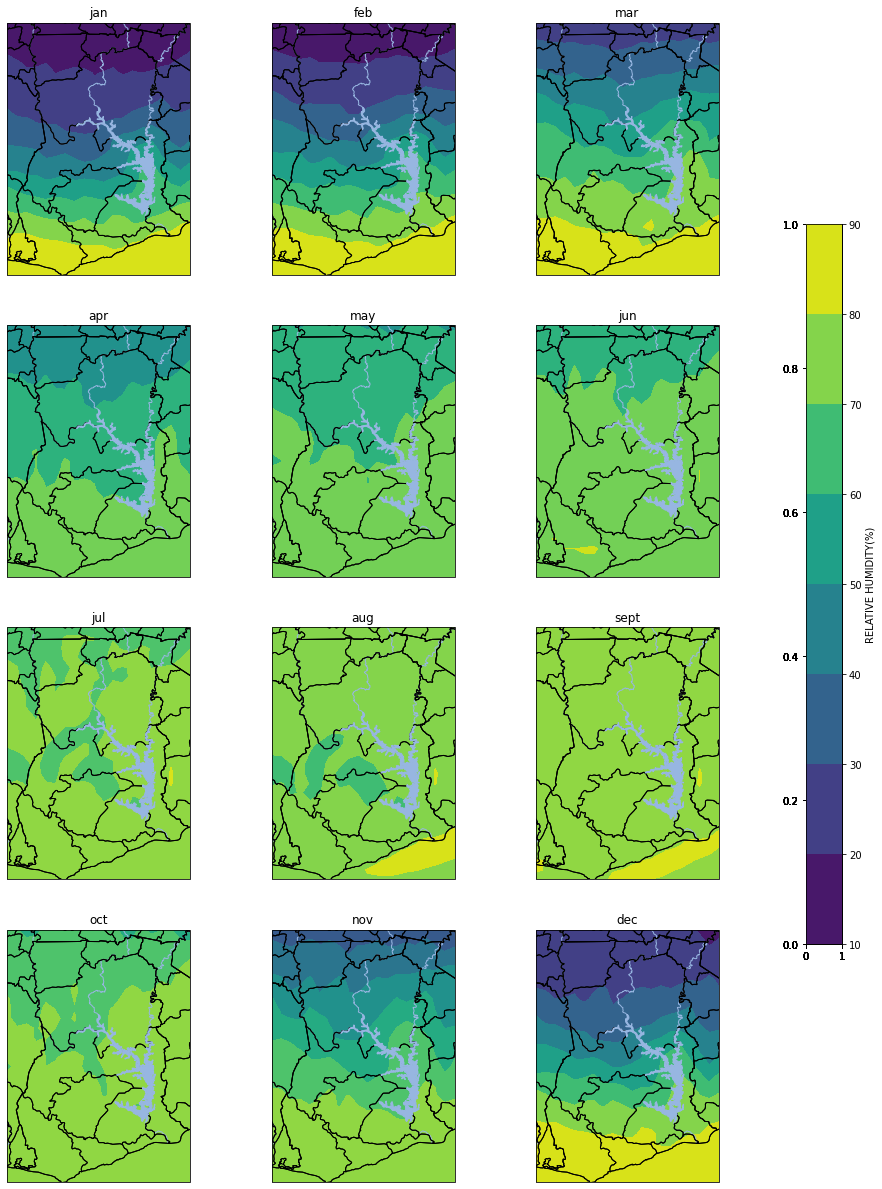

In [7]:
fig,ax=plt.subplots(4,3,figsize=(20,20),subplot_kw={'projection':ccrs.PlateCarree()})
ax = ax.flatten()
                    
month_names=['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
for i in range(12):
    ax[i].add_feature(cf.COASTLINE,zorder=2)
    ax[i].add_feature(cf.BORDERS,zorder=2)
    ax[i].add_feature(cf.RIVERS,zorder=2)
    ax[i].add_feature(cf.STATES,zorder=2)
    ax[i].add_feature(cf.LAKES,zorder=2)
    ax[i].set_extent([-3.5,1.25,4.76,11.3])
    ax[i].set_title(month_names[i])
    cb=ax[i].contourf(rh_clim.longitude,rh_clim.latitude,rh_clim[i],transform=ccrs.PlateCarree())              
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
                    
fig.colorbar(cb,cax=color_bar,label='RELATIVE HUMIDITY(%)')
plt.subplots_adjust(wspace=-0.55,top=0.93)                